In [1]:
import pandas as pd
import numpy as np

In [2]:
df_customer = pd.read_csv('customer.csv')
df_product = pd.read_csv('product.csv', on_bad_lines='skip')
df_transactions = pd.read_csv('transactions.csv')
df_clickstream = pd.read_csv('click_stream.csv')
list_data = [df_customer, df_product, df_transactions, df_clickstream]

In [3]:
df_transactions.fillna('No Promo',inplace=True)
df_transactions.isna().sum()

created_at                0
customer_id               0
booking_id                0
session_id                0
product_metadata          0
payment_method            0
payment_status            0
promo_amount              0
promo_code                0
shipment_fee              0
shipment_date_limit       0
shipment_location_lat     0
shipment_location_long    0
total_amount              0
dtype: int64

In [4]:
df_product['year'] = pd.to_datetime(df_product['year'], format = '%Y')
df_product.head(2)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011-01-01,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012-01-01,Casual,Peter England Men Party Blue Jeans


In [5]:
df_product['year'] = df_product['year'].dt.strftime('%Y')
df_product.head(2)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans


In [6]:
df_product.dropna(subset=['year'], inplace = True)
df_product.isna().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 20
year                    0
usage                 317
productDisplayName      7
dtype: int64

In [7]:
df_product['baseColour'].fillna(method='pad', inplace = True)

In [8]:
df_product['usage'].fillna(method='pad', inplace = True)

In [9]:
df_product.dropna(subset=['productDisplayName'], inplace = True)

In [10]:
df_product.isna().sum()

id                     0
gender                 0
masterCategory         0
subCategory            0
articleType            0
baseColour             0
season                20
year                   0
usage                  0
productDisplayName     0
dtype: int64

In [11]:
df_product['season'].unique()

array(['Fall', 'Summer', 'Winter', 'Spring', nan], dtype=object)

In [12]:
df_product['season'].fillna(method='pad', inplace = True)
df_product.isna().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64

In [13]:
df_clickstream['event_name'].unique()

array(['HOMEPAGE', 'SCROLL', 'ADD_TO_CART', 'BOOKING', 'SEARCH',
       'ITEM_DETAIL', 'ADD_PROMO', 'CLICK', 'PROMO_PAGE'], dtype=object)

In [14]:
df_clickstream[df_clickstream['event_name'] == 'ITEM_DETAIL']['event_metadata'].unique()

array([nan], dtype=object)

In [15]:
df_clickstream[df_clickstream['event_name'] == 'ADD_TO_CART']['event_metadata'].unique()

array(["{'product_id': 15315, 'quantity': 4, 'item_price': 313529}",
       "{'product_id': 6133, 'quantity': 2, 'item_price': 249443}",
       "{'product_id': 6721, 'quantity': 1, 'item_price': 134504}", ...,
       "{'product_id': 19386, 'quantity': 1, 'item_price': 208644}",
       "{'product_id': 13143, 'quantity': 1, 'item_price': 284949}",
       "{'product_id': 19820, 'quantity': 1, 'item_price': 88918}"],
      dtype=object)

In [16]:
df_clickstream[df_clickstream['event_name'] == 'BOOKING']['event_metadata'].unique()

array(["{'payment_status': 'Success'}", "{'payment_status': 'Failed'}"],
      dtype=object)

In [17]:
df_clickstream[df_clickstream['event_name'] == 'CLICK']['event_metadata'].unique()

array([nan], dtype=object)

In [18]:
df_clickstream[df_clickstream['event_name'] == 'PROMO_PAGE']['event_metadata'].unique()

array([nan], dtype=object)

In [19]:
booking = df_clickstream[df_clickstream['event_name'] == 'BOOKING']
booking = booking.loc[:, booking.columns != 'event_metadata']
booking

,session_id,event_name,event_time,event_id,traffic_source
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE
21,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,BOOKING,2019-09-09T12:17:55.425431Z,3e6b12bf-2a80-4399-9afb-6bb1e0fa15bc,MOBILE
40,b2843a94-248f-429e-bd54-1a456b4ef4a7,BOOKING,2019-09-17T12:17:58.425431Z,2d046ae1-7489-425f-95e3-926d87578c10,MOBILE
47,d9aaa8a8-5e60-4e1e-ab0a-bb9755a7a3e9,BOOKING,2019-09-25T12:30:19.425431Z,622fb041-d094-43d7-988a-da0bb66f17f0,WEB
54,98e66f53-f24f-4238-8c9c-34a0482e22d5,BOOKING,2019-10-03T12:34:39.425431Z,8dcb9da3-a650-4649-b480-4ac8d97bb397,MOBILE
...,...,...,...,...,...
12833584,f38416ce-51f2-46b0-a476-776d8fed1cb0,BOOKING,2021-08-01T08:36:19.259139Z,11761e75-081d-4c89-8c3b-a44441953987,WEB
12833588,c1ce86f6-858b-4009-af5b-f1483a28d020,BOOKING,2020-09-22T23:15:15.843895Z,c00f477c-3007-4707-a287-cd9c2c40dbd0,WEB
12833592,f5c4bbe0-f977-45bb-af23-6ab524df7777,BOOKING,2022-04-09T21:19:08.619449Z,cf4276ea-8a31-4293-afaf-5e923c2be13d,MOBILE
12833596,ad1063b0-a6e5-40a9-aed6-d1b45741e571,BOOKING,2021-06-07T04:50:54.096245Z,fa07ad46-6e4d-45db-a06a-ced7eb60b80b,MOBILE


In [20]:
import ast

In [21]:
df_transactions['product_metadata'] = df_transactions['product_metadata'].apply(ast.literal_eval)

In [22]:
df_transactions = df_transactions.explode('product_metadata')

df_transactions = pd.concat([df_transactions.drop(['product_metadata'], axis=1), df_transactions['product_metadata'].apply(pd.Series)], axis=1)
df_transactions

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,No Promo,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,No Promo,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,No Promo,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,No Promo,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852579,2021-09-21T22:10:05.074873Z,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,Debit Card,Failed,0,No Promo,0,2021-09-27T00:43:40.992167Z,-6.869535,111.077145,226820,30642,2,113410
852580,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203,19394,1,354213
852581,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159,13079,4,288835
852582,2019-12-18T11:01:09.623382Z,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143,11312,1,188646


In [23]:
transactions = df_transactions.merge(booking, on = 'session_id', how = 'left')
transactions

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,event_name,event_time,event_id,traffic_source
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247,BOOKING,2018-07-29T15:22:01.458193Z,74a81855-2725-42f8-968d-9a142316745d,WEB
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,No Promo,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526,BOOKING,2018-07-30T12:40:22.365620Z,ace20e22-053f-416c-987f-7d9599c30353,MOBILE
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,No Promo,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174,BOOKING,2018-09-15T11:51:17.365620Z,8dd15a94-e987-4bdf-a9c9-9a5d2072e8a5,MOBILE
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,No Promo,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012,BOOKING,2018-11-01T11:23:48.365620Z,e44648d8-be8c-47ac-ab38-ba67cfb03d11,MOBILE
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,No Promo,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753,BOOKING,2018-12-18T11:20:30.365620Z,4db72e33-b40f-4f5e-a9dc-b60caa989b37,MOBILE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254580,2021-09-21T22:10:05.074873Z,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,Debit Card,Failed,0,No Promo,0,2021-09-27T00:43:40.992167Z,-6.869535,111.077145,226820,30642,2,113410,BOOKING,2021-09-21T22:10:05.074873Z,5b2b6d61-7001-46e7-a868-12bf8d2c0dd7,MOBILE
1254581,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203,19394,1,354213,BOOKING,2021-12-09T07:35:18.222046Z,3425a518-65d8-4be5-bf77-4fa494b9bece,MOBILE
1254582,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159,13079,4,288835,BOOKING,2021-12-11T01:20:36.944593Z,53d36f15-4740-40d8-821b-8a11110a9d56,MOBILE
1254583,2019-12-18T11:01:09.623382Z,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143,11312,1,188646,BOOKING,2019-12-18T11:01:09.623382Z,a2eb7c22-97e8-4c77-9897-504e1107c001,MOBILE


In [24]:
transactions.sort_values(['customer_id', 'created_at'], inplace = True)

In [25]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254585 entries, 352123 to 1202276
Data columns (total 20 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   created_at              1254585 non-null  object 
 1   customer_id             1254585 non-null  int64  
 2   booking_id              1254585 non-null  object 
 3   session_id              1254585 non-null  object 
 4   payment_method          1254585 non-null  object 
 5   payment_status          1254585 non-null  object 
 6   promo_amount            1254585 non-null  int64  
 7   promo_code              1254585 non-null  object 
 8   shipment_fee            1254585 non-null  int64  
 9   shipment_date_limit     1254585 non-null  object 
 10  shipment_location_lat   1254585 non-null  float64
 11  shipment_location_long  1254585 non-null  float64
 12  total_amount            1254585 non-null  int64  
 13  product_id              1254585 non-null  int64  
 1

In [26]:
transactions['created_at'] = pd.to_datetime(transactions['created_at'])

transactions['created_at'] = transactions['created_at'].dt.strftime('%Y-%m')
transactions['created_at']

352123     2018-08
352124     2018-09
352125     2018-10
352126     2018-11
352127     2018-12
            ...   
336586     2022-01
336587     2022-01
336588     2022-01
336589     2022-01
1202276    2016-10
Name: created_at, Length: 1254585, dtype: object

In [27]:
transaction_success = transactions[transactions['payment_status'] == 'Success']
transaction_success

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,event_name,event_time,event_id,traffic_source
352123,2018-08,3,856b0c3d-b076-406b-be11-3dfee762e9be,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,Credit Card,Success,8073,WEEKENDMANTAP,0,2018-08-27T05:08:15.817545Z,-6.151858,106.945839,826597,56019,5,166934,BOOKING,2018-08-25T18:54:03.844494Z,2d922c77-8334-448d-8447-2d1320a58a18,MOBILE
352124,2018-09,3,f9b17de8-5db3-40dc-9227-664c6679543c,36673b2f-940a-42b5-994d-1cce4796b55f,Credit Card,Success,0,No Promo,10000,2018-09-25T19:14:55.732974Z,-8.710879,122.178317,163784,30235,1,153784,BOOKING,2018-09-22T18:42:52.844494Z,e8bd90c5-5e62-437b-8c15-18e4434f529f,MOBILE
352125,2018-10,3,caa8be57-6239-4b5b-ae0b-e27887a13356,93e1d3c4-bed1-4ef4-b79f-e24a79e905b7,Credit Card,Success,8828,WEEKENDSERU,10000,2018-10-26T05:26:58.264371Z,-8.391546,115.345669,124932,7808,1,123760,BOOKING,2018-10-20T19:07:54.844494Z,572e5596-0658-4b96-a693-fa69f639fffb,MOBILE
352126,2018-11,3,688cef52-8ee7-44ea-98af-20daf0c5609b,8356370c-267e-4530-a2d3-1830e4be3f2b,Credit Card,Success,3415,WEEKENDSERU,0,2018-11-21T05:06:08.279671Z,-6.151858,106.945839,247902,48968,1,251317,BOOKING,2018-11-17T19:09:49.844494Z,19d9110c-a439-475a-9bc0-f3aa470c1277,MOBILE
352127,2018-12,3,a12fb778-d19a-4559-9808-8115f01c1595,ef7f4829-e7d1-4513-861b-1fbbc6e41bbf,Credit Card,Success,2645,LIBURDONG,10000,2018-12-18T21:15:53.089926Z,-0.988670,109.794413,181237,59272,1,173882,BOOKING,2018-12-15T19:33:50.844494Z,1b026629-137e-49f7-89b1-81ab1c20811b,MOBILE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336586,2022-01,99998,06fbe4b4-e98b-403d-a05d-396ae9903e2a,4fc4d81b-4b29-4aef-bd1f-263c373950d1,Credit Card,Success,1954,BUYMORE,10000,2022-01-26T18:07:50.318967Z,1.321632,124.803129,4222436,18523,1,358650,BOOKING,2022-01-25T00:54:09.703960Z,005433ee-e2b6-4107-95f7-663187175a06,MOBILE
336587,2022-01,99998,06fbe4b4-e98b-403d-a05d-396ae9903e2a,4fc4d81b-4b29-4aef-bd1f-263c373950d1,Credit Card,Success,1954,BUYMORE,10000,2022-01-26T18:07:50.318967Z,1.321632,124.803129,4222436,44211,1,135965,BOOKING,2022-01-25T00:54:09.703960Z,005433ee-e2b6-4107-95f7-663187175a06,MOBILE
336588,2022-01,99998,06fbe4b4-e98b-403d-a05d-396ae9903e2a,4fc4d81b-4b29-4aef-bd1f-263c373950d1,Credit Card,Success,1954,BUYMORE,10000,2022-01-26T18:07:50.318967Z,1.321632,124.803129,4222436,16555,1,248506,BOOKING,2022-01-25T00:54:09.703960Z,005433ee-e2b6-4107-95f7-663187175a06,MOBILE
336589,2022-01,99998,06fbe4b4-e98b-403d-a05d-396ae9903e2a,4fc4d81b-4b29-4aef-bd1f-263c373950d1,Credit Card,Success,1954,BUYMORE,10000,2022-01-26T18:07:50.318967Z,1.321632,124.803129,4222436,20236,1,170392,BOOKING,2022-01-25T00:54:09.703960Z,005433ee-e2b6-4107-95f7-663187175a06,MOBILE


In [28]:
transaction_success_labeling = transaction_success.groupby(['customer_id', 'created_at'], as_index = False).agg({'booking_id':'count'})
transaction_success_labeling

,customer_id,created_at,booking_id
0,3,2018-08,1
1,3,2018-09,1
2,3,2018-10,1
3,3,2018-11,1
4,3,2018-12,1
...,...,...,...
565536,99998,2020-07,2
565537,99998,2021-01,1
565538,99998,2021-07,1
565539,99998,2022-01,16


In [29]:
transactions_book = transaction_success_labeling.loc[:, ['booking_id']]

In [30]:
transactions_book.set_index('booking_id', inplace = True)

In [31]:
label_churn = []

for index, a in transactions_book.iterrows():
    if index >= 1:
        label_churn.append(1)
    else:
        label_churn.append(0)

In [32]:
df_label_churn = pd.DataFrame(label_churn)

In [33]:
df_label_churn.rename(columns = {0:'label_churn'}, inplace = True)

In [34]:
df_label_churn

,label_churn
0,1
1,1
2,1
3,1
4,1
...,...
565536,1
565537,1
565538,1
565539,1


In [35]:
transaction_book_label = pd.concat([transaction_success_labeling, df_label_churn], axis = 1, ignore_index = True)
transaction_book_label

,0,1,2,3
0,3,2018-08,1,1
1,3,2018-09,1,1
2,3,2018-10,1,1
3,3,2018-11,1,1
4,3,2018-12,1,1
...,...,...,...,...
565536,99998,2020-07,2,1
565537,99998,2021-01,1,1
565538,99998,2021-07,1,1
565539,99998,2022-01,16,1


In [36]:
transaction_book_label.rename(columns = {0:'customer_id', 1:'date', 2:'book_freq', 3:'book_label'}, inplace = True)

In [37]:
transaction_book_label

,customer_id,date,book_freq,book_label
0,3,2018-08,1,1
1,3,2018-09,1,1
2,3,2018-10,1,1
3,3,2018-11,1,1
4,3,2018-12,1,1
...,...,...,...,...
565536,99998,2020-07,2,1
565537,99998,2021-01,1,1
565538,99998,2021-07,1,1
565539,99998,2022-01,16,1


In [38]:
transaction_book_label = transaction_book_label.loc[:, transaction_book_label.columns != 'book_freq']
transaction_book_label

,customer_id,date,book_label
0,3,2018-08,1
1,3,2018-09,1
2,3,2018-10,1
3,3,2018-11,1
4,3,2018-12,1
...,...,...,...
565536,99998,2020-07,1
565537,99998,2021-01,1
565538,99998,2021-07,1
565539,99998,2022-01,1


In [39]:
transaction_book_label_pivot = transaction_book_label.pivot_table(values = 'book_label', index = 'customer_id', columns = ['date'], dropna = False, aggfunc = 'first', fill_value = 0).reset_index()
transaction_book_label_pivot

date,customer_id,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,...,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07
0,3,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
3,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,15,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50237,99992,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
50238,99995,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
50239,99997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50240,99998,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [40]:
df_customer['first_join_date'] = pd.to_datetime(df_customer['first_join_date'])

In [41]:
df_customer['first_join_date'] = df_customer['first_join_date'].dt.strftime('%Y-%m')

In [42]:
customer_firstjoin = df_customer[['customer_id', 'first_join_date']]
customer_firstjoin

,customer_id,first_join_date
0,2870,2019-07
1,8193,2017-07
2,7279,2020-08
3,88813,2021-10
4,82542,2021-04
...,...,...
99995,34743,2020-10
99996,72065,2017-11
99997,32818,2018-09
99998,75597,2020-05


In [43]:
customer_label = customer_firstjoin.merge(transaction_book_label[['customer_id', 'book_label']], on = 'customer_id', how = 'right')
customer_label

,customer_id,first_join_date,book_label
0,3,2018-08,1
1,3,2018-08,1
2,3,2018-08,1
3,3,2018-08,1
4,3,2018-08,1
...,...,...,...
565536,99998,2018-07,1
565537,99998,2018-07,1
565538,99998,2018-07,1
565539,99998,2018-07,1


In [44]:
customer_label = customer_label.loc[:, customer_label.columns != 'book_label']
customer_label

,customer_id,first_join_date
0,3,2018-08
1,3,2018-08
2,3,2018-08
3,3,2018-08
4,3,2018-08
...,...,...
565536,99998,2018-07
565537,99998,2018-07
565538,99998,2018-07
565539,99998,2018-07


In [45]:
label_first_join_date = []

In [46]:
for index, value in customer_label[['first_join_date']].iterrows():
    label_first_join_date.append(7)

In [47]:
df_label_customer_firstjoin = pd.DataFrame(label_first_join_date)
df_label_customer_firstjoin

,0
0,7
1,7
2,7
3,7
4,7
...,...
565536,7
565537,7
565538,7
565539,7


In [48]:
df_label_customer_firstjoin = pd.concat([customer_label, df_label_customer_firstjoin], axis = 1)
df_label_customer_firstjoin

,customer_id,first_join_date,0
0,3,2018-08,7
1,3,2018-08,7
2,3,2018-08,7
3,3,2018-08,7
4,3,2018-08,7
...,...,...,...
565536,99998,2018-07,7
565537,99998,2018-07,7
565538,99998,2018-07,7
565539,99998,2018-07,7


In [49]:
df_label_customer_firstjoin.rename(columns = {0:'label'}, inplace = True)

In [50]:
df_label_customer_firstjoin

,customer_id,first_join_date,label
0,3,2018-08,7
1,3,2018-08,7
2,3,2018-08,7
3,3,2018-08,7
4,3,2018-08,7
...,...,...,...
565536,99998,2018-07,7
565537,99998,2018-07,7
565538,99998,2018-07,7
565539,99998,2018-07,7


In [51]:
df_label_customer_firstjoin = df_label_customer_firstjoin.pivot_table(values = 'label', index = 'customer_id', columns = 'first_join_date', aggfunc = 'count', fill_value = 0).reset_index()
df_label_customer_firstjoin

first_join_date,customer_id,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,...,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50237,99992,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50238,99995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50239,99997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50240,99998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df_label_customer_firstjoin.replace({1:7}, inplace = True)

In [53]:
join_label = df_label_customer_firstjoin.loc[:, df_label_customer_firstjoin.columns != 'customer_id']
join_label

first_join_date,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,...,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
transactions_label = transaction_book_label_pivot.loc[:, df_label_customer_firstjoin.columns != 'customer_id']
transactions_label

date,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,...,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50237,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
50238,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
50239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [55]:
transactions_label.columns

Index(['2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11',
       '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05',
       '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11',
       '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05',
       '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11',
       '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05',
       '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11',
       '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05',
       '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11',
       '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05',
       '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11',
       '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05',
       '2022-06', '2022-07'],
      dtype='object', name='date')

In [56]:
np_join_label = join_label.to_numpy()
np_join_label

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [57]:
np_transactions_label = transactions_label.to_numpy()
np_transactions_label

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [58]:
np_labeling_customer = np_join_label + np_transactions_label
np_labeling_customer

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [59]:
df_labeling_customer = pd.DataFrame(np_labeling_customer, columns = ['2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11',
       '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05',
       '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11',
       '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05',
       '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11',
       '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05',
       '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11',
       '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05',
       '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11',
       '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05',
       '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11',
       '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05',
       '2022-06', '2022-07'])
df_labeling_customer

,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,...,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,8,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50237,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
50238,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
50239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [60]:
customer_id_for_labeling = df_label_customer_firstjoin[['customer_id']]
customer_id_for_labeling

first_join_date,customer_id
0,3
1,8
2,9
3,11
4,15
...,...
50237,99992
50238,99995
50239,99997
50240,99998


In [61]:
customer_labeling = pd.concat([customer_id_for_labeling, df_labeling_customer], axis = 1, ignore_index = False)
customer_labeling

,customer_id,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,...,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07
0,3,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
3,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,8,0,0,0,0
4,15,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50237,99992,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
50238,99995,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
50239,99997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50240,99998,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [62]:
juli2022 = customer_labeling[['customer_id', '2022-07']]
juli2022

,customer_id,2022-07
0,3,0
1,8,0
2,9,0
3,11,0
4,15,0
...,...,...
50237,99992,0
50238,99995,1
50239,99997,0
50240,99998,0


In [63]:
juli2022['is_churn'] = (juli2022['2022-07']).apply(lambda x: True if x < 1 else False)
juli2022['is_churn'].value_counts()
juli2022

C:\Users\ertit\AppData\Local\Temp\ipykernel_5008\665207824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  juli2022['is_churn'] = (juli2022['2022-07']).apply(lambda x: True if x < 1 else False)


,customer_id,2022-07,is_churn
0,3,0,True
1,8,0,True
2,9,0,True
3,11,0,True
4,15,0,True
...,...,...,...
50237,99992,0,True
50238,99995,1,False
50239,99997,0,True
50240,99998,0,True


<AxesSubplot:ylabel='is_churn'>

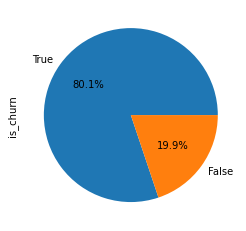

In [64]:
juli2022['is_churn'].value_counts().plot.pie(autopct='%1.1f%%')

In [65]:
customer_labeling['is_churn'] = (customer_labeling['2021-12'] | customer_labeling['2022-01'] | customer_labeling['2022-02'] |
                                 customer_labeling['2022-03'] | customer_labeling['2022-04'] | customer_labeling['2022-05'] | 
                                 customer_labeling['2022-06']).apply(lambda x: True if x < 1 else False)
customer_labeling['is_churn'].value_counts()
customer_labeling

,customer_id,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,...,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,is_churn
0,3,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,0,False
1,8,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,False
2,9,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,False
3,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,8,0,0,0,0,False
4,15,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50237,99992,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,False
50238,99995,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,False
50239,99997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
50240,99998,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,False


In [144]:
customer_labeling.iloc[:, 67:73]

,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05
0,1,1,1,1,1,1
1,1,0,1,0,0,1
2,0,1,0,1,0,1
3,0,0,0,8,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
50237,0,1,0,1,0,1
50238,1,1,1,1,1,1
50239,0,0,0,0,0,0
50240,0,1,0,0,0,0


In [145]:
customer_labeling.iloc[:, 68:74]

,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
0,1,1,1,1,1,1
1,0,1,0,0,1,0
2,1,0,1,0,1,0
3,0,0,8,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
50237,1,0,1,0,1,0
50238,1,1,1,1,1,1
50239,0,0,0,0,0,0
50240,1,0,0,0,0,0


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<AxesSubplot:ylabel='is_churn'>

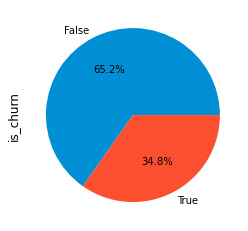

In [68]:
customer_labeling['is_churn'].value_counts().plot.pie(autopct='%1.1f%%')

In [69]:
# customer_labeling.to_csv('customer_labeling.csv',index=False)

In [70]:
customer_churn = customer_labeling[['customer_id', 'is_churn']]
customer_churn

,customer_id,is_churn
0,3,False
1,8,False
2,9,False
3,11,False
4,15,False
...,...,...
50237,99992,False
50238,99995,False
50239,99997,True
50240,99998,False


In [71]:
recency= transaction_success.groupby('customer_id')['created_at'].max().reset_index()
recency['created_at'] = pd.to_datetime(recency.created_at).dt.tz_localize(None)
recency.head()

,customer_id,created_at
0,3,2022-06-01
1,8,2022-05-01
2,9,2022-05-01
3,11,2022-03-01
4,15,2022-01-01


In [72]:
recency['recency'] = (recency['created_at'].max() - recency['created_at']).dt.days
recency.head()

,customer_id,created_at,recency
0,3,2022-06-01,30
1,8,2022-05-01,61
2,9,2022-05-01,61
3,11,2022-03-01,122
4,15,2022-01-01,181


In [73]:
transaction_success = transaction_success.merge(recency, on = 'customer_id')
transaction_success.head()

,created_at_x,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,total_amount,product_id,quantity,item_price,event_name,event_time,event_id,traffic_source,created_at_y,recency
0,2018-08,3,856b0c3d-b076-406b-be11-3dfee762e9be,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,Credit Card,Success,8073,WEEKENDMANTAP,0,2018-08-27T05:08:15.817545Z,...,826597,56019,5,166934,BOOKING,2018-08-25T18:54:03.844494Z,2d922c77-8334-448d-8447-2d1320a58a18,MOBILE,2022-06-01,30
1,2018-09,3,f9b17de8-5db3-40dc-9227-664c6679543c,36673b2f-940a-42b5-994d-1cce4796b55f,Credit Card,Success,0,No Promo,10000,2018-09-25T19:14:55.732974Z,...,163784,30235,1,153784,BOOKING,2018-09-22T18:42:52.844494Z,e8bd90c5-5e62-437b-8c15-18e4434f529f,MOBILE,2022-06-01,30
2,2018-10,3,caa8be57-6239-4b5b-ae0b-e27887a13356,93e1d3c4-bed1-4ef4-b79f-e24a79e905b7,Credit Card,Success,8828,WEEKENDSERU,10000,2018-10-26T05:26:58.264371Z,...,124932,7808,1,123760,BOOKING,2018-10-20T19:07:54.844494Z,572e5596-0658-4b96-a693-fa69f639fffb,MOBILE,2022-06-01,30
3,2018-11,3,688cef52-8ee7-44ea-98af-20daf0c5609b,8356370c-267e-4530-a2d3-1830e4be3f2b,Credit Card,Success,3415,WEEKENDSERU,0,2018-11-21T05:06:08.279671Z,...,247902,48968,1,251317,BOOKING,2018-11-17T19:09:49.844494Z,19d9110c-a439-475a-9bc0-f3aa470c1277,MOBILE,2022-06-01,30
4,2018-12,3,a12fb778-d19a-4559-9808-8115f01c1595,ef7f4829-e7d1-4513-861b-1fbbc6e41bbf,Credit Card,Success,2645,LIBURDONG,10000,2018-12-18T21:15:53.089926Z,...,181237,59272,1,173882,BOOKING,2018-12-15T19:33:50.844494Z,1b026629-137e-49f7-89b1-81ab1c20811b,MOBILE,2022-06-01,30


In [74]:
# Membuat kolom customer yang melakukan pembelian kembali (Frequency)

frequency = transaction_success[['created_at_y','customer_id']].groupby('customer_id').count()
frequency.rename(columns={'created_at_y':'frequency'}, inplace=True)
frequency.head()

,frequency
customer_id,
3,69
8,8
9,8
11,1
15,9


In [75]:
transaction_success = transaction_success.merge(frequency['frequency'], on = 'customer_id')
transaction_success.head()

,created_at_x,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,product_id,quantity,item_price,event_name,event_time,event_id,traffic_source,created_at_y,recency,frequency
0,2018-08,3,856b0c3d-b076-406b-be11-3dfee762e9be,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,Credit Card,Success,8073,WEEKENDMANTAP,0,2018-08-27T05:08:15.817545Z,...,56019,5,166934,BOOKING,2018-08-25T18:54:03.844494Z,2d922c77-8334-448d-8447-2d1320a58a18,MOBILE,2022-06-01,30,69
1,2018-09,3,f9b17de8-5db3-40dc-9227-664c6679543c,36673b2f-940a-42b5-994d-1cce4796b55f,Credit Card,Success,0,No Promo,10000,2018-09-25T19:14:55.732974Z,...,30235,1,153784,BOOKING,2018-09-22T18:42:52.844494Z,e8bd90c5-5e62-437b-8c15-18e4434f529f,MOBILE,2022-06-01,30,69
2,2018-10,3,caa8be57-6239-4b5b-ae0b-e27887a13356,93e1d3c4-bed1-4ef4-b79f-e24a79e905b7,Credit Card,Success,8828,WEEKENDSERU,10000,2018-10-26T05:26:58.264371Z,...,7808,1,123760,BOOKING,2018-10-20T19:07:54.844494Z,572e5596-0658-4b96-a693-fa69f639fffb,MOBILE,2022-06-01,30,69
3,2018-11,3,688cef52-8ee7-44ea-98af-20daf0c5609b,8356370c-267e-4530-a2d3-1830e4be3f2b,Credit Card,Success,3415,WEEKENDSERU,0,2018-11-21T05:06:08.279671Z,...,48968,1,251317,BOOKING,2018-11-17T19:09:49.844494Z,19d9110c-a439-475a-9bc0-f3aa470c1277,MOBILE,2022-06-01,30,69
4,2018-12,3,a12fb778-d19a-4559-9808-8115f01c1595,ef7f4829-e7d1-4513-861b-1fbbc6e41bbf,Credit Card,Success,2645,LIBURDONG,10000,2018-12-18T21:15:53.089926Z,...,59272,1,173882,BOOKING,2018-12-15T19:33:50.844494Z,1b026629-137e-49f7-89b1-81ab1c20811b,MOBILE,2022-06-01,30,69


In [76]:
transaction_success.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201035 entries, 0 to 1201034
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   created_at_x            1201035 non-null  object        
 1   customer_id             1201035 non-null  int64         
 2   booking_id              1201035 non-null  object        
 3   session_id              1201035 non-null  object        
 4   payment_method          1201035 non-null  object        
 5   payment_status          1201035 non-null  object        
 6   promo_amount            1201035 non-null  int64         
 7   promo_code              1201035 non-null  object        
 8   shipment_fee            1201035 non-null  int64         
 9   shipment_date_limit     1201035 non-null  object        
 10  shipment_location_lat   1201035 non-null  float64       
 11  shipment_location_long  1201035 non-null  float64       
 12  total_amount  

In [77]:
# Membuat kolom pembelian tiap customer (Monetary)

transaction_success.groupby('customer_id')['total_amount'].sum().reset_index()
transaction_success.rename({'total_amount':'monetary'},axis = 1, inplace = True)
transaction_success.head()

,created_at_x,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,product_id,quantity,item_price,event_name,event_time,event_id,traffic_source,created_at_y,recency,frequency
0,2018-08,3,856b0c3d-b076-406b-be11-3dfee762e9be,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,Credit Card,Success,8073,WEEKENDMANTAP,0,2018-08-27T05:08:15.817545Z,...,56019,5,166934,BOOKING,2018-08-25T18:54:03.844494Z,2d922c77-8334-448d-8447-2d1320a58a18,MOBILE,2022-06-01,30,69
1,2018-09,3,f9b17de8-5db3-40dc-9227-664c6679543c,36673b2f-940a-42b5-994d-1cce4796b55f,Credit Card,Success,0,No Promo,10000,2018-09-25T19:14:55.732974Z,...,30235,1,153784,BOOKING,2018-09-22T18:42:52.844494Z,e8bd90c5-5e62-437b-8c15-18e4434f529f,MOBILE,2022-06-01,30,69
2,2018-10,3,caa8be57-6239-4b5b-ae0b-e27887a13356,93e1d3c4-bed1-4ef4-b79f-e24a79e905b7,Credit Card,Success,8828,WEEKENDSERU,10000,2018-10-26T05:26:58.264371Z,...,7808,1,123760,BOOKING,2018-10-20T19:07:54.844494Z,572e5596-0658-4b96-a693-fa69f639fffb,MOBILE,2022-06-01,30,69
3,2018-11,3,688cef52-8ee7-44ea-98af-20daf0c5609b,8356370c-267e-4530-a2d3-1830e4be3f2b,Credit Card,Success,3415,WEEKENDSERU,0,2018-11-21T05:06:08.279671Z,...,48968,1,251317,BOOKING,2018-11-17T19:09:49.844494Z,19d9110c-a439-475a-9bc0-f3aa470c1277,MOBILE,2022-06-01,30,69
4,2018-12,3,a12fb778-d19a-4559-9808-8115f01c1595,ef7f4829-e7d1-4513-861b-1fbbc6e41bbf,Credit Card,Success,2645,LIBURDONG,10000,2018-12-18T21:15:53.089926Z,...,59272,1,173882,BOOKING,2018-12-15T19:33:50.844494Z,1b026629-137e-49f7-89b1-81ab1c20811b,MOBILE,2022-06-01,30,69


In [78]:
transaction_success.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201035 entries, 0 to 1201034
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   created_at_x            1201035 non-null  object        
 1   customer_id             1201035 non-null  int64         
 2   booking_id              1201035 non-null  object        
 3   session_id              1201035 non-null  object        
 4   payment_method          1201035 non-null  object        
 5   payment_status          1201035 non-null  object        
 6   promo_amount            1201035 non-null  int64         
 7   promo_code              1201035 non-null  object        
 8   shipment_fee            1201035 non-null  int64         
 9   shipment_date_limit     1201035 non-null  object        
 10  shipment_location_lat   1201035 non-null  float64       
 11  shipment_location_long  1201035 non-null  float64       
 12  monetary      

In [79]:
# transaction_success.to_csv('transaction_success.csv',index=False)

In [80]:
trans_success = transaction_success.groupby(['customer_id', 'created_at_x', 'payment_method', 'payment_status','promo_amount', 'monetary','quantity', 'recency', 'frequency'], as_index = False).agg({'booking_id':'count'})
trans_success
# trans_success = transaction_success.groupby(['created_at_x', 'payment_method', 'payment_status', 'promo_amount', 'monetary','quantity', 'recency', 'frequency'])['customer_id'].nunique().reset_index()
# trans_success

,customer_id,created_at_x,payment_method,payment_status,promo_amount,monetary,quantity,recency,frequency,booking_id
0,3,2018-08,Credit Card,Success,8073,826597,5,30,69,1
1,3,2018-09,Credit Card,Success,0,163784,1,30,69,1
2,3,2018-10,Credit Card,Success,8828,124932,1,30,69,1
3,3,2018-11,Credit Card,Success,3415,247902,1,30,69,1
4,3,2018-12,Credit Card,Success,2645,181237,1,30,69,1
...,...,...,...,...,...,...,...,...,...,...
894935,99998,2021-07,Debit Card,Success,0,485330,2,181,24,1
894936,99998,2022-01,Credit Card,Success,1954,4222436,1,181,24,14
894937,99998,2022-01,Credit Card,Success,1954,4222436,2,181,24,1
894938,99998,2022-01,Credit Card,Success,1954,4222436,6,181,24,1


In [81]:
trans_success['customer_id'].nunique()

50242

In [82]:
final_dataset = trans_success.merge(customer_churn, on = 'customer_id', how='left')
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894940 entries, 0 to 894939
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   customer_id     894940 non-null  int64 
 1   created_at_x    894940 non-null  object
 2   payment_method  894940 non-null  object
 3   payment_status  894940 non-null  object
 4   promo_amount    894940 non-null  int64 
 5   monetary        894940 non-null  int64 
 6   quantity        894940 non-null  int64 
 7   recency         894940 non-null  int64 
 8   frequency       894940 non-null  int64 
 9   booking_id      894940 non-null  int64 
 10  is_churn        894940 non-null  bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 76.0+ MB


In [83]:
final_dataset = final_dataset.drop_duplicates(subset=['customer_id'])
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50242 entries, 0 to 894939
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     50242 non-null  int64 
 1   created_at_x    50242 non-null  object
 2   payment_method  50242 non-null  object
 3   payment_status  50242 non-null  object
 4   promo_amount    50242 non-null  int64 
 5   monetary        50242 non-null  int64 
 6   quantity        50242 non-null  int64 
 7   recency         50242 non-null  int64 
 8   frequency       50242 non-null  int64 
 9   booking_id      50242 non-null  int64 
 10  is_churn        50242 non-null  bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 4.3+ MB


In [84]:
from datetime import datetime, date

In [85]:
df_customer['birthdate'] = pd.to_datetime(df_customer['birthdate'])

In [86]:
def age(born):
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
df_customer['age'] = df_customer['birthdate'].apply(age)

In [87]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   customer_id         100000 non-null  int64         
 1   first_name          100000 non-null  object        
 2   last_name           100000 non-null  object        
 3   username            100000 non-null  object        
 4   email               100000 non-null  object        
 5   gender              100000 non-null  object        
 6   birthdate           100000 non-null  datetime64[ns]
 7   device_type         100000 non-null  object        
 8   device_id           100000 non-null  object        
 9   device_version      100000 non-null  object        
 10  home_location_lat   100000 non-null  float64       
 11  home_location_long  100000 non-null  float64       
 12  home_location       100000 non-null  object        
 13  home_country        100000 non

In [88]:
customer_age = df_customer[['customer_id', 'age']]
customer_age

,customer_id,age
0,2870,26
1,8193,29
2,7279,33
3,88813,31
4,82542,22
...,...,...
99995,34743,22
99996,72065,24
99997,32818,29
99998,75597,22


In [89]:
final_dataset = final_dataset.merge(customer_age, on = 'customer_id', how='left')

In [90]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50242 entries, 0 to 50241
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     50242 non-null  int64 
 1   created_at_x    50242 non-null  object
 2   payment_method  50242 non-null  object
 3   payment_status  50242 non-null  object
 4   promo_amount    50242 non-null  int64 
 5   monetary        50242 non-null  int64 
 6   quantity        50242 non-null  int64 
 7   recency         50242 non-null  int64 
 8   frequency       50242 non-null  int64 
 9   booking_id      50242 non-null  int64 
 10  is_churn        50242 non-null  bool  
 11  age             50242 non-null  int64 
dtypes: bool(1), int64(8), object(3)
memory usage: 4.6+ MB


In [91]:
final_dataset.head()

,customer_id,created_at_x,payment_method,payment_status,promo_amount,monetary,quantity,recency,frequency,booking_id,is_churn,age
0,3,2018-08,Credit Card,Success,8073,826597,5,30,69,1,False,36
1,8,2021-02,Credit Card,Success,7699,223431,1,61,8,1,False,22
2,9,2021-06,Gopay,Success,0,643165,1,61,8,2,False,16
3,11,2022-03,OVO,Success,9492,197533,1,122,1,1,False,29
4,15,2019-09,LinkAja,Success,0,1078094,1,181,9,5,False,39


In [92]:
final_dataset = final_dataset.rename({'created_at_x':'most_recent'},axis = 1)
final_dataset

,customer_id,most_recent,payment_method,payment_status,promo_amount,monetary,quantity,recency,frequency,booking_id,is_churn,age
0,3,2018-08,Credit Card,Success,8073,826597,5,30,69,1,False,36
1,8,2021-02,Credit Card,Success,7699,223431,1,61,8,1,False,22
2,9,2021-06,Gopay,Success,0,643165,1,61,8,2,False,16
3,11,2022-03,OVO,Success,9492,197533,1,122,1,1,False,29
4,15,2019-09,LinkAja,Success,0,1078094,1,181,9,5,False,39
...,...,...,...,...,...,...,...,...,...,...,...,...
50237,99992,2020-06,OVO,Success,0,275829,1,61,17,1,False,38
50238,99995,2020-08,Credit Card,Success,5054,99627,1,0,78,1,False,16
50239,99997,2020-04,Gopay,Success,0,226461,1,821,1,1,True,18
50240,99998,2018-07,Credit Card,Success,3181,211841,2,181,24,1,False,8


In [93]:
final_dataset = final_dataset.rename({'booking_id':'transaction_amount'},axis = 1)
final_dataset

,customer_id,most_recent,payment_method,payment_status,promo_amount,monetary,quantity,recency,frequency,transaction_amount,is_churn,age
0,3,2018-08,Credit Card,Success,8073,826597,5,30,69,1,False,36
1,8,2021-02,Credit Card,Success,7699,223431,1,61,8,1,False,22
2,9,2021-06,Gopay,Success,0,643165,1,61,8,2,False,16
3,11,2022-03,OVO,Success,9492,197533,1,122,1,1,False,29
4,15,2019-09,LinkAja,Success,0,1078094,1,181,9,5,False,39
...,...,...,...,...,...,...,...,...,...,...,...,...
50237,99992,2020-06,OVO,Success,0,275829,1,61,17,1,False,38
50238,99995,2020-08,Credit Card,Success,5054,99627,1,0,78,1,False,16
50239,99997,2020-04,Gopay,Success,0,226461,1,821,1,1,True,18
50240,99998,2018-07,Credit Card,Success,3181,211841,2,181,24,1,False,8


In [94]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50242 entries, 0 to 50241
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         50242 non-null  int64 
 1   most_recent         50242 non-null  object
 2   payment_method      50242 non-null  object
 3   payment_status      50242 non-null  object
 4   promo_amount        50242 non-null  int64 
 5   monetary            50242 non-null  int64 
 6   quantity            50242 non-null  int64 
 7   recency             50242 non-null  int64 
 8   frequency           50242 non-null  int64 
 9   transaction_amount  50242 non-null  int64 
 10  is_churn            50242 non-null  bool  
 11  age                 50242 non-null  int64 
dtypes: bool(1), int64(8), object(3)
memory usage: 4.6+ MB


<AxesSubplot:ylabel='is_churn'>

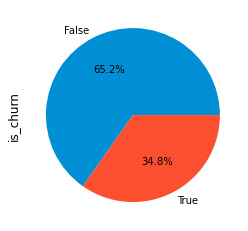

In [95]:
final_dataset['is_churn'].value_counts().plot.pie(autopct='%1.1f%%')

In [96]:
def func(x):
    if x == 0:
        return 1
    elif x <= 5150:
        return 2
    else:
        return 3


final_dataset['promo_amount_used'] = final_dataset['promo_amount'].apply(func)
final_dataset

,customer_id,most_recent,payment_method,payment_status,promo_amount,monetary,quantity,recency,frequency,transaction_amount,is_churn,age,promo_amount_used
0,3,2018-08,Credit Card,Success,8073,826597,5,30,69,1,False,36,3
1,8,2021-02,Credit Card,Success,7699,223431,1,61,8,1,False,22,3
2,9,2021-06,Gopay,Success,0,643165,1,61,8,2,False,16,1
3,11,2022-03,OVO,Success,9492,197533,1,122,1,1,False,29,3
4,15,2019-09,LinkAja,Success,0,1078094,1,181,9,5,False,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50237,99992,2020-06,OVO,Success,0,275829,1,61,17,1,False,38,1
50238,99995,2020-08,Credit Card,Success,5054,99627,1,0,78,1,False,16,2
50239,99997,2020-04,Gopay,Success,0,226461,1,821,1,1,True,18,1
50240,99998,2018-07,Credit Card,Success,3181,211841,2,181,24,1,False,8,2


In [99]:
def func(row):
    if row <= 2.371495e+05:
        return 1
    elif row <= 4.019420e+05:
        return 2
    elif row <= 8.667350e+05:
        return 3
    else:
        return 4

final_dataset['total_amount_paid'] = final_dataset['monetary'].apply(func)

In [105]:
tot_amount_paid = pd.crosstab(final_dataset["total_amount_paid"], final_dataset["is_churn"], margins=True, margins_name="Total")
tot_amount_paid

is_churn,False,True,Total
total_amount_paid,,,
1,11570,6128,17698
2,10405,5448,15853
3,6433,3523,9956
4,4366,2369,6735
Total,32774,17468,50242


In [131]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50242 entries, 0 to 50241
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         50242 non-null  int64 
 1   most_recent         50242 non-null  object
 2   payment_method      50242 non-null  object
 3   payment_status      50242 non-null  object
 4   promo_amount        50242 non-null  int64 
 5   monetary            50242 non-null  int64 
 6   quantity            50242 non-null  int64 
 7   recency             50242 non-null  int64 
 8   frequency           50242 non-null  int64 
 9   transaction_amount  50242 non-null  int64 
 10  is_churn            50242 non-null  bool  
 11  age                 50242 non-null  int64 
 12  promo_amount_used   50242 non-null  int64 
 13  total_amount_paid   50242 non-null  int64 
dtypes: bool(1), int64(10), object(3)
memory usage: 5.4+ MB


In [140]:
X = final_dataset[['customer_id', 'most_recent', 'payment_method', 'payment_status', 'promo_amount', 'monetary', 
                  'recency', 'quantity', 'frequency', 'transaction_amount', 'age', 'promo_amount_used', 'total_amount_paid']]
y = final_dataset[["is_churn"]]

In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print("Jumlah data training: ", X_train.shape)
print("Jumlah data testing: ", X_test.shape)

Jumlah data training:  (35169, 13)
Jumlah data testing:  (15073, 13)


In [142]:
def calc_iv(df, feature, target, pr=False):
    
    lst = []

    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())

    iv = data['IV'].sum()

    return iv, data

In [143]:
iv_df = X_train.copy()
iv_df["target"] = y_train

features = iv_df.columns[:-1].tolist()

iv_list = []
for feature in features:
    iv, data = calc_iv(iv_df, feature, 'target')
    iv_list.append(round(iv,6))

woe_df = pd.DataFrame(np.column_stack([features, iv_list]), 
                      columns=['Feature', 'iv'])
woe_df

,Feature,iv
0,customer_id,0.0
1,most_recent,0.348774
2,payment_method,0.001303
3,payment_status,0.0
4,promo_amount,0.110873
5,monetary,0.015222
6,recency,0.352014
7,quantity,0.002722
8,frequency,2.379952
9,transaction_amount,0.002525


In [138]:
final_dataset.to_csv('final_dataset.csv',index=False)